In [137]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import splitfolders as spfd
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm

In [2]:
dataset_path = "D:/Latihan/Dataset/"

In [4]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset_path):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

#print('Total number of files',totalFiles)
#print('Total Number of directories',totalDir)

In [5]:
index = np.arange(1,12,1)
d = {'Class': os.listdir(dataset_path), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Class,Total_image_in_class
1,acne fulminans,70
2,acne nodules,71
3,blackhead,70
4,dermatitis perioral,70
5,flek hitam,73
6,fungal acne,70
7,milia,84
8,papula,70
9,pustula,70
10,rosacea,83


In [6]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data1)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data1['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 11
Jumlah total gambar dalam dataset adalah 801


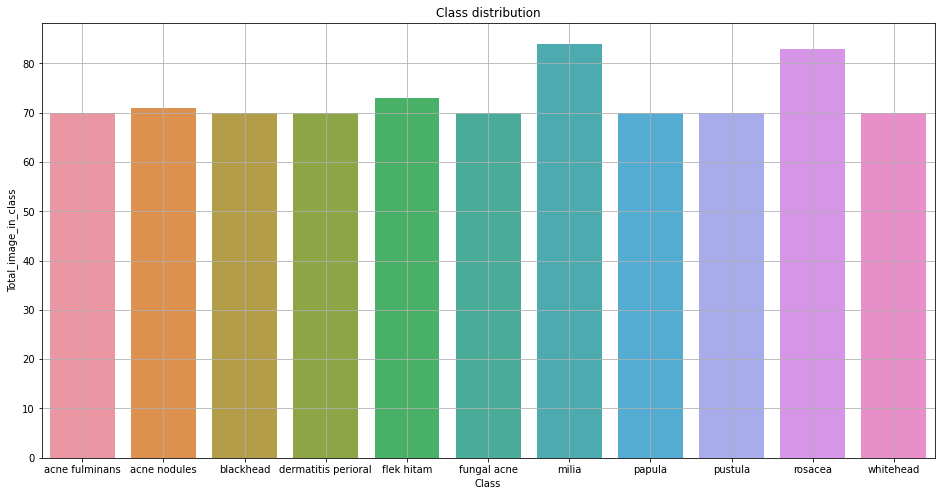

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.grid()
plt.show()

#### Distribusi antar kelas cenderung sama menandakan bahwa dataset yang digunakan memiliki proporsi yang cukup baik

In [8]:
filenames = []
folder = []
image = []
for path, subdirs, files in tqdm(os.walk(dataset_path)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]

data2 = pd.DataFrame({'Image path':filenames, 'Class':folder, 'Name_Image':image})

12it [00:00, 1078.39it/s]


In [9]:
extension = []
for i in range (sum(data1['Total_image_in_class'])) :
    strValue = data2['Name_Image'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [10]:
data2['Extension'] = extension
data2

,Image path,Class,Name_Image,Extension
0,D:/Latihan/Dataset/acne fulminans\f1.jpg,acne fulminans,f1.jpg,.jpg
1,D:/Latihan/Dataset/acne fulminans\f10.jpg,acne fulminans,f10.jpg,.jpg
2,D:/Latihan/Dataset/acne fulminans\f11.jpg,acne fulminans,f11.jpg,.jpg
3,D:/Latihan/Dataset/acne fulminans\f12.jpg,acne fulminans,f12.jpg,.jpg
4,D:/Latihan/Dataset/acne fulminans\f13.jpg,acne fulminans,f13.jpg,.jpg
...,...,...,...,...
796,D:/Latihan/Dataset/whitehead\w69.jpg,whitehead,w69.jpg,.jpg
797,D:/Latihan/Dataset/whitehead\w7.jpg,whitehead,w7.jpg,.jpg
798,D:/Latihan/Dataset/whitehead\w70.jpg,whitehead,w70.jpg,.jpg
799,D:/Latihan/Dataset/whitehead\w8.jpg,whitehead,w8.jpg,.jpg


In [11]:
data2['Extension'].unique()

array(['.jpg'], dtype=object)

#### Dataset telah memiliki ekstensi gambar yang sama yaitu .jpg sehingga tidak perlu mengubah ekstensi dari masing-masing gambar

In [12]:
data2.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()

array(['acne fulminans', 'acne nodules', 'blackhead',
       'dermatitis perioral', 'flek hitam', 'fungal acne', 'milia',
       'papula', 'pustula', 'rosacea', 'whitehead'], dtype=object)

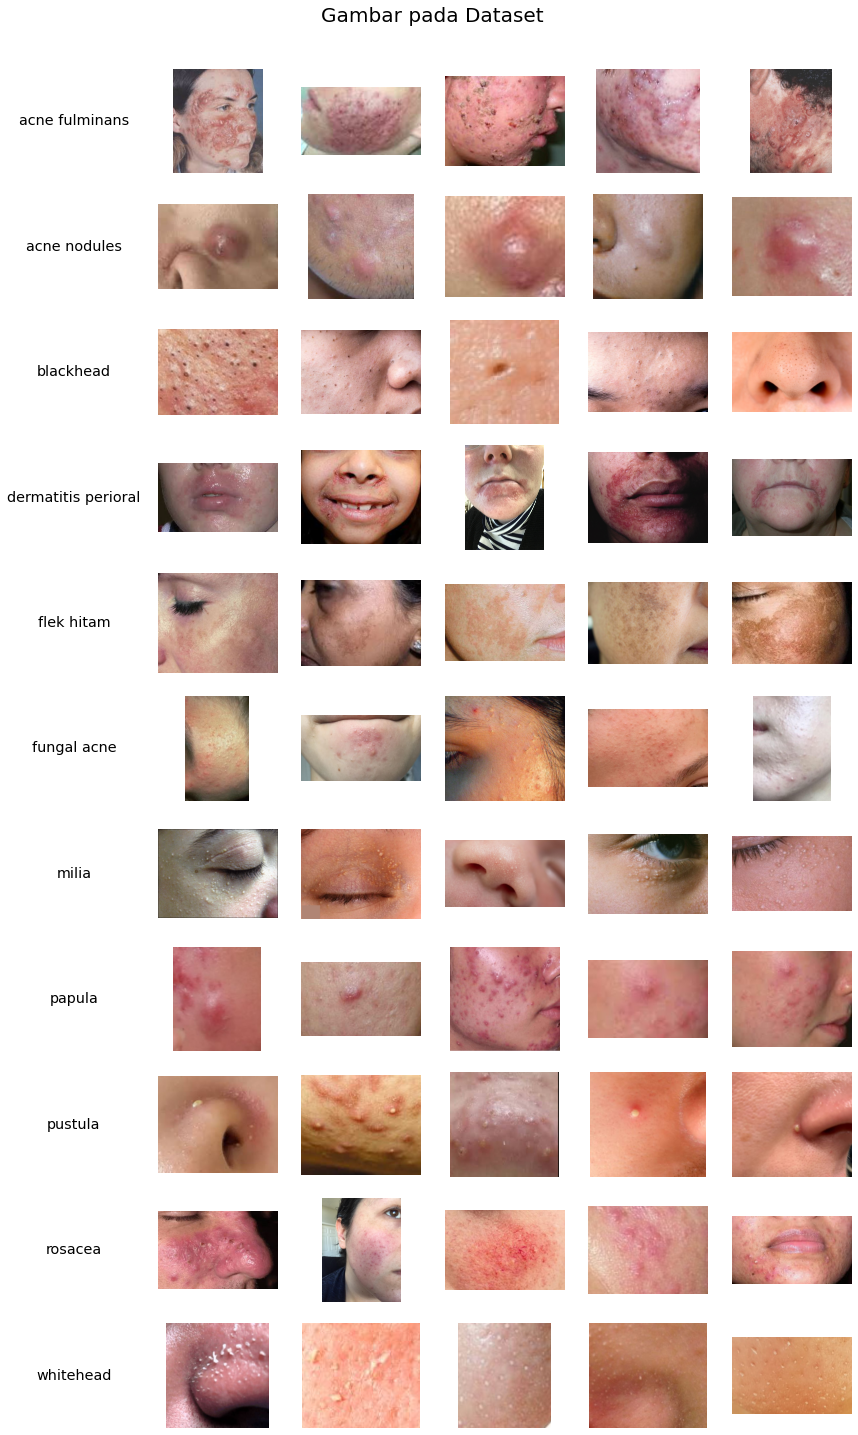

In [13]:
unique_list = []
unique = data2.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15, 25))
plt.title('Gambar pada Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 11
img2show = data2.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Image path'])
        #kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        #plt.title(f'{kelas}')
plt.show()

## Mengsplit dataset
#### Karena dataset memiliki 801 gambar, kita akan membaginya kedalam train, test, validation dengan proporsi train:test:validation = 0.8,0.1,0.1

In [121]:
output = "D:/Latihan/Output"
spfd.ratio(dataset_path, output=output, seed=1337, ratio=(0.8, 0.2)) 

Copying files: 801 files [00:07, 113.80 files/s]


In [122]:
train_dir = os.path.join("D:/Latihan/Output/train")
validation_dir = os.path.join("D:/Latihan/Output/val")

In [123]:
#################
# Training File #
#################
train_list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(train_dir):
    train_list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

###################
# Validation File #
###################
validation_list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(validation_dir):
    validation_list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [124]:
index = np.arange(1,12,1)
d = {'Class': os.listdir(dataset_path), 'Image_in_training': np.delete(train_list, [0]),
    'Image_in_validation': np.delete(validation_list, [0])
    }
data3 = pd.DataFrame(data=d, index=index)
data3

,Class,Image_in_training,Image_in_validation
1,acne fulminans,56,14
2,acne nodules,56,15
3,blackhead,56,14
4,dermatitis perioral,56,14
5,flek hitam,58,15
6,fungal acne,56,14
7,milia,67,17
8,papula,56,14
9,pustula,56,14
10,rosacea,66,17


## Modelling

In [141]:
img_size = 224

train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   rescale=1.0/255.,
                                   brightness_range=[0.4,1.5],
                                   width_shift_range=0.1,
                                   height_shift_range=0.1) 
    
validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size,img_size),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    seed=1337)

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                              target_size=(img_size, img_size),
                                                              class_mode='categorical',
                                                              batch_size=8,
                                                              seed=1337)

Found 639 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


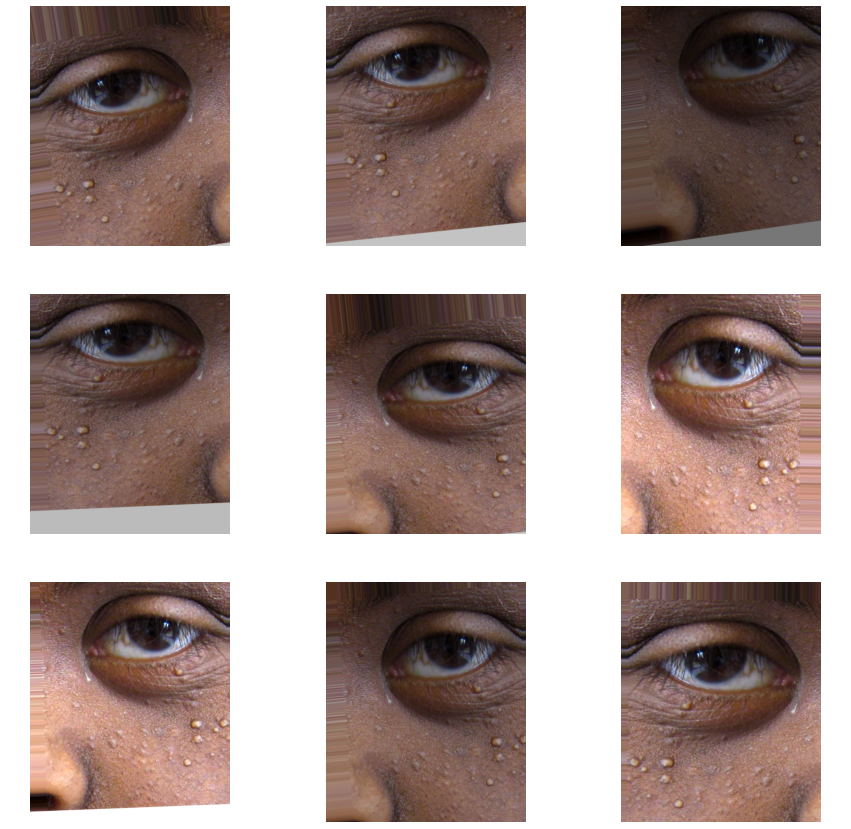

In [19]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
img = load_img("D:/Latihan/Output/train/milia/m35.jpg")
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(            rotation_range=10,
                                         zoom_range=0.1,
                                         horizontal_flip=True,
                                         brightness_range=[0.4,1.3],
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1,
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot


fig = plt.figure(figsize=(15, 15))
plt.axis('off')
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    batch = it.next()

    image = batch[0].astype('uint8')

    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image)
    
    plt.axis('off')
plt.show()

In [142]:
#Create Model
import tensorflow_hub as hub
from keras.regularizers import l2
def createModel():
  feature_extractor= hub.KerasLayer('https://tfhub.dev/tensorflow/resnet_50/feature_vector/1',input_shape=(224,224) + (3,))
  feature_extractor.trainable = False
  model=tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(11,activation='softmax')
  ])
  model.summary()
  return model

In [143]:
#Make model
model=createModel()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_generator,
                  epochs=20,
                  verbose=1,
                  validation_data=validation_generator)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_16 (KerasLayer)  (None, 2048)             23561152  
                                                                 
 flatten_33 (Flatten)        (None, 2048)              0         
                                                                 
 dense_59 (Dense)            (None, 512)               1049088   
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_60 (Dense)            (None, 11)                5643      
                                                                 
Total params: 24,617,931
Trainable params: 1,055,755
Non-trainable params: 23,562,176
_________________________________

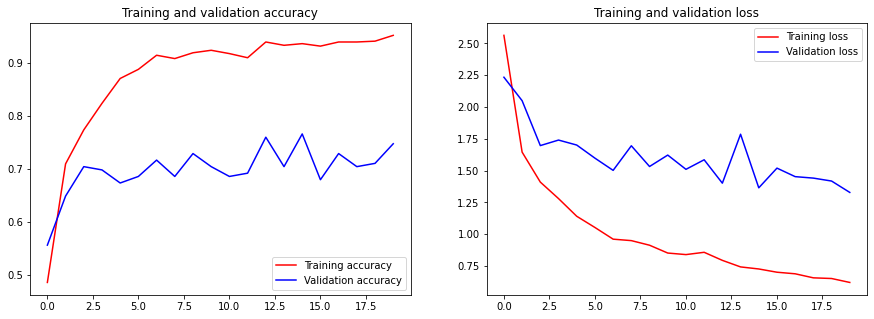

In [140]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()